In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In C:\Users\rrust\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\rrust\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\rrust\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\rrust\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\rrust\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

# Lets do some EDA

In [2]:
data=pd.read_csv('placement_data.csv')
data.head(10)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN


In [3]:
del data['gender'],data['sl_no']
data.head()

,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [54]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data, title='Pandas Profiling Report', explorative=True)
profile.to_widgets()

C:\Users\rrust\Anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


In [5]:
data.isnull().sum(axis=0)

ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

[]

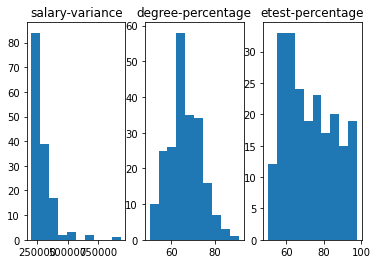

In [400]:
plt.subplot(1,3,1)
plt.hist(data['salary'])
plt.title('salary-variance')

plt.subplot(1,3,2)
plt.hist(data['degree_p'])
plt.title('degree-percentage')

plt.subplot(1,3,3)
plt.hist(data['etest_p'])
plt.title('etest-percentage')
plt.plot()

In [401]:
mean_sal_deg=pd.DataFrame(data['salary'].groupby(data['degree_t']).mean())
mean_sal_deg

,salary
degree_t,
Comm&Mgmt,278627.450980
Others,280400.000000
Sci&Tech,314609.756098


In [402]:
mean_sal_stream=pd.DataFrame(data['salary'].groupby(data['hsc_s']).mean())
mean_sal_stream

,salary
hsc_s,
Arts,248666.666667
Commerce,287417.721519
Science,294015.873016


In [403]:
mean_sal_specialisation=pd.DataFrame(data['salary'].groupby(data['specialisation']).mean())
mean_sal_specialisation

,salary
specialisation,
Mkt&Fin,298852.631579
Mkt&HR,270377.358491


[]

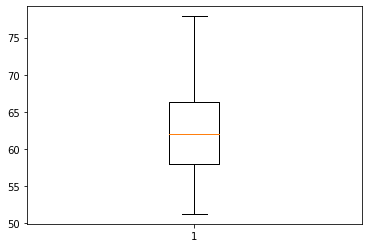

In [404]:
plt.boxplot(data['mba_p'])
plt.plot()


 
# Now we are going to create a model for placement prediction 

In [430]:
new_data=data.copy()
new_data.head()

,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [431]:
del new_data['salary']
new_data.dtypes



ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
dtype: object

In [432]:
new_data=pd.get_dummies(new_data,drop_first=True)
new_data.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR,status_Placed
0,67.00,91.00,58.00,55.0,58.80,1,1,1,0,0,1,0,1,1
1,79.33,78.33,77.48,86.5,66.28,0,1,0,1,0,1,1,0,1
2,65.00,68.00,64.00,75.0,57.80,0,0,0,0,0,0,0,0,1
3,56.00,52.00,52.00,66.0,59.43,0,0,0,1,0,1,0,1,0
4,85.80,73.60,73.30,96.8,55.50,0,0,1,0,0,0,0,0,1


In [433]:
cols=new_data.columns[0:5]
from sklearn.preprocessing import StandardScaler
normaliser=StandardScaler()
new_data[cols]=pd.DataFrame(normaliser.fit_transform(new_data[cols]))
new_data.head()

    

,ssc_p,hsc_p,degree_p,etest_p,mba_p,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR,status_Placed
0,-0.028087,2.268812,-1.140102,-1.291091,-0.597647,1,1,1,0,0,1,0,1,1
1,1.113369,1.103448,1.513267,1.087157,0.687620,0,1,0,1,0,1,1,0,1
2,-0.213238,0.153313,-0.322843,0.218908,-0.769474,0,0,0,0,0,0,0,0,1
3,-1.046417,-1.318339,-1.957362,-0.460592,-0.489396,0,0,0,1,0,1,0,1,0
4,1.712332,0.668391,0.943909,1.864806,-1.164676,0,0,1,0,0,0,0,0,1


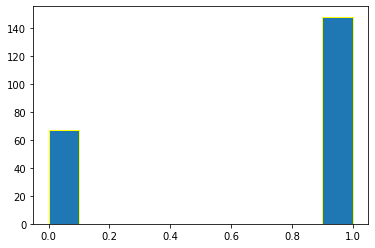

In [434]:
plt.hist(new_data['status_Placed'], edgecolor='yellow')
plt.show()

In [435]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
x=new_data.iloc[:,:-1]
y=new_data.iloc[:,-1]

In [436]:
from sklearn.feature_selection import RFE
rfe=RFE(estimator=dt,n_features_to_select=6,step=4)
rfe.fit(x,y)

RFE(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                     criterion='gini', max_depth=None,
                                     max_features=None, max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     presort='deprecated', random_state=None,
                                     splitter='best'),
    n_features_to_select=6, step=4, verbose=0)

In [437]:
res=pd.DataFrame(x.columns,rfe.ranking_)
res

,0
1,ssc_p
1,hsc_p
1,degree_p
1,etest_p
1,mba_p
2,ssc_b_Others
3,hsc_b_Others
3,hsc_s_Commerce
2,hsc_s_Science
3,degree_t_Others


In [438]:
res=res[(res.index)!=1]

In [439]:
for columns in res[0]:
    del new_data[columns]

In [447]:
x=new_data.iloc[:,:-1]
y=new_data.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3 ,stratify=y)


In [448]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [450]:
score=RFC.score(x_test,y_test)
y_pred=RFC.predict(x_test)
y_prob=RFC.predict_proba(x_test)
y_pro=y_prob[:,1]
score


0.8769230769230769

In [452]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_test)
print(cm)

[[15  3]
 [ 5 42]]


In [453]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.75      0.79        20
           1       0.89      0.93      0.91        45

    accuracy                           0.88        65
   macro avg       0.86      0.84      0.85        65
weighted avg       0.88      0.88      0.88        65



In [454]:
filename = 'finalized_model.sav'
pickle.dump(RFC, open(filename, 'wb'))

<IPython.core.display.Javascript object>

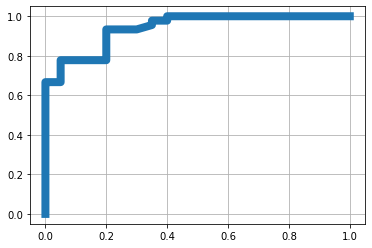

In [451]:
from sklearn.metrics import roc_curve
FPR,TPR,Threshold=roc_curve(y_test,y_pro)
plt.plot(FPR,TPR,linewidth=8)
plt.grid(True)
plt.show()